# Stroke Prediction: Classification

## Data Dictionary:
1. id: unique identifier (int)
2. gender: "Male", "Female" or "Other" (object)
3. age: age of the patient (int)
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension (int)
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease (int)
6. ever_married: "No" or "Yes" (object)
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" (object)
8. Residence_type: "Rural" or "Urban" (object)
9. avg_glucose_level: average glucose level in blood (int)
10. bmi: body mass index (int)
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* (object)
12. stroke: 1 if the patient had a stroke or 0 if not (int)

## Import Libraries

In [42]:
# Import Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Metrics
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay, precision_score,
                             PrecisionRecallDisplay, recall_score, RocCurveDisplay, f1_score,
                            accuracy_score, classification_report)

sns.set(style="darkgrid")

## Load Data Set

In [2]:
# Load Data
df = pd.read_csv("C:\\Users\\hamma\\Coding Dojo\\00 Data Sets\\healthcare-dataset-stroke-data (2).csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

> There are 5110 rows and 12 columns

In [4]:
# Make copy of dataset for machine learning later
df_ml = df.copy()
df_ml.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data Cleaning

In [5]:
# Inspect Data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# Delete Unnecessary Columns
df.drop(columns='id',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


> The 'id' column was removed since it was a unique identifier to each row.

In [7]:
# Check for Duplicated Rows
df.duplicated().sum()

0

> There are no duplicated rows to be dealt with.

In [8]:
# Find Missing Values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
total_bmi_count = df['bmi'].value_counts().sum()
missing_bmi_count = df['bmi'].isna().sum()

print(total_bmi_count)
missing_bmi_count

4909


201

In [10]:
# Percent of missing bmi values
missing_bmi_count / total_bmi_count

0.040945202688938684

> 4.1% of the bmi column is missing. Since this is a low percentage these values will be dropped

In [17]:
# Drop missing values in 'bmi' column
df.dropna(subset='bmi', inplace=True)
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# # Use 'bmi' column to create a new categorical column
# # bmi < 18.5 = underweight
# # bmi >= 18.5 | < 24.9 = normal weight
# # bmi >= 25 | < 29.9 = overweight
# # bmi >= 30 | < 34.9 = class 1 obesity
# # bmi >= 35 | < 39.9 = class 2 obesity
# # bmi >= 40 = class 3 obesity
# df['weight_status'] = df['bmi'].apply(lambda x: 'underweight' if x < 18.5 else
#                             'normal weight' if x >= 18.5 and x < 24.9 else
#                             'overweight' if x >= 25 and x < 29.9 else 
#                             'class 1 obesity' if x >= 30 and x < 34.9 else
#                             'class 2 obesity' if x >= 35 and x < 39.9 else
#                             'class 3 obesity')
# df['weight_status'].value_counts()

In [18]:
# Checking the Data Types Compared to Data Dictionary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


> All data types match the data dictionary.

In [19]:
# Identify Inconsistencies in Categorical Values
for i in df.select_dtypes(include='object'):
  count = df[i].value_counts()
  print(count)

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64
Yes    3204
No     1705
Name: ever_married, dtype: int64
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64
Urban    2490
Rural    2419
Name: Residence_type, dtype: int64
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64


In [20]:
df['work_type'].replace('children', 'Children', inplace=True)
df['work_type'].value_counts()

Private          2811
Self-employed     775
Children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [21]:
df['smoking_status'].replace({'never smoked': 'Never Smoked', 'formerly smoked': 'Formerly Smoked', 'smokes': 'Smokes'}, inplace=True)
df['smoking_status'].value_counts()

Never Smoked       1852
Unknown            1483
Formerly Smoked     837
Smokes              737
Name: smoking_status, dtype: int64

In [22]:
# Inspect Data for Impossible Values
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


> Although not impossible a min value of 10.3 and max value of 97.6 for BMI are unlikely. This will be  further explored in EDA

In [ ]:
# # Create new categorical column for 'age' column
# df['age_status'] = df['age'].apply(lambda x: 'infant' if x <= 1 else 'child' if x > 1
#                            and x <= 12 else 'adolescent' if x > 12 and x <= 17
#                            else 'adult' if x > 17 and x < 65 else 'senior')
# df['age_status'].value_counts(normalize=True)

In [24]:
# Inspect categorical statistics
df.describe(exclude='number')

,gender,ever_married,work_type,Residence_type,smoking_status
count,4909,4909,4909,4909,4909
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,Never Smoked
freq,2897,3204,2811,2490,1852


## Exploratory Data Analysis

In [89]:
# Function for plotting boxplots and histograms
def plot_num(col):
    # Subplots
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12,6))
    
    # Boxplot
    sns.boxplot(df[col], ax=ax_box, orient='h')

    # Histogram
    sns.histplot(data=df, x=col, ax=ax_hist)

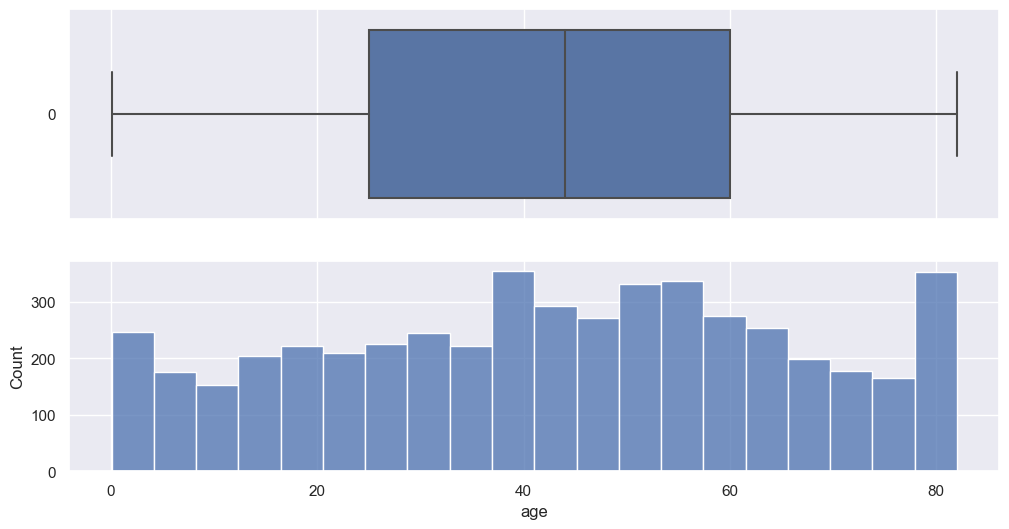

In [90]:
plot_num('age')

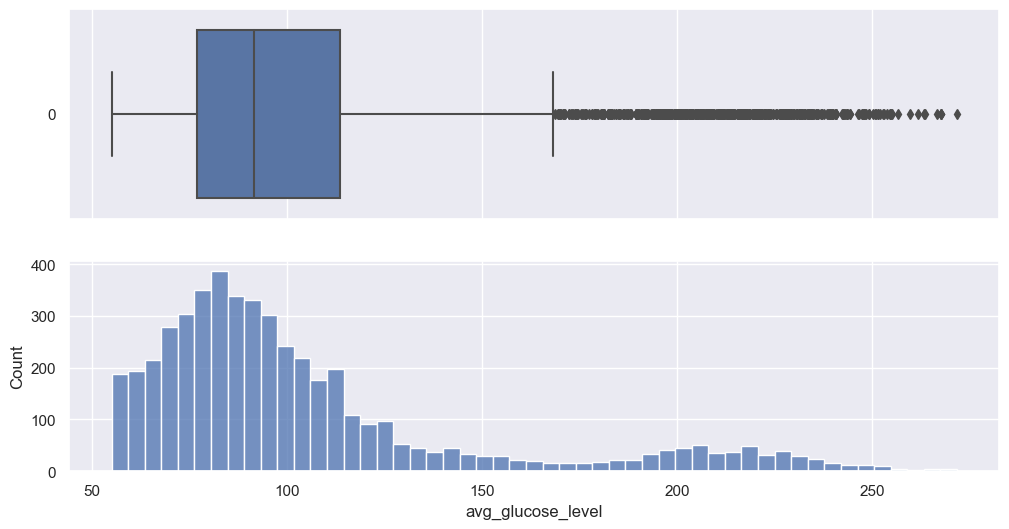

In [91]:
plot_num('avg_glucose_level')

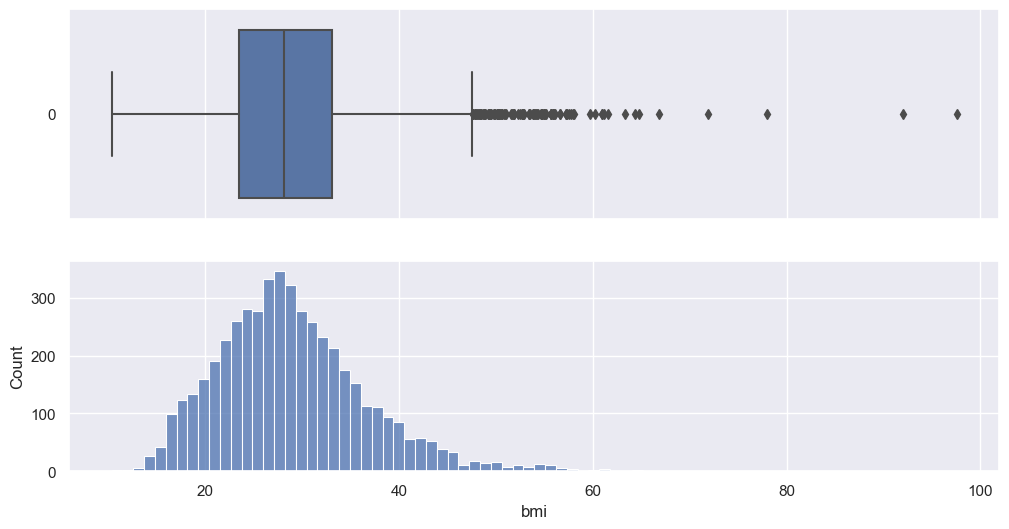

In [92]:
plot_num('bmi')

In [ ]:
# Create correlation heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='Greens', annot=True)
plt.xticks(rotation=45);

> There is a low correlation between age and stroke. It is worth noting that age is correlated with all of the features and target. The correlation is very low, but it would be worth exploring if the correlations went up or down with different combinations of the features.

In [94]:
# Convert 'stroke', 'heart_disease', and 'hypertension' to object dtype
#df['stroke'] = df['stroke'].astype('object')
df['heart_disease'] = df['heart_disease'].astype('object')
df['hypertension'] = df['hypertension'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   object 
 3   heart_disease      4909 non-null   object 
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 589.3+ KB


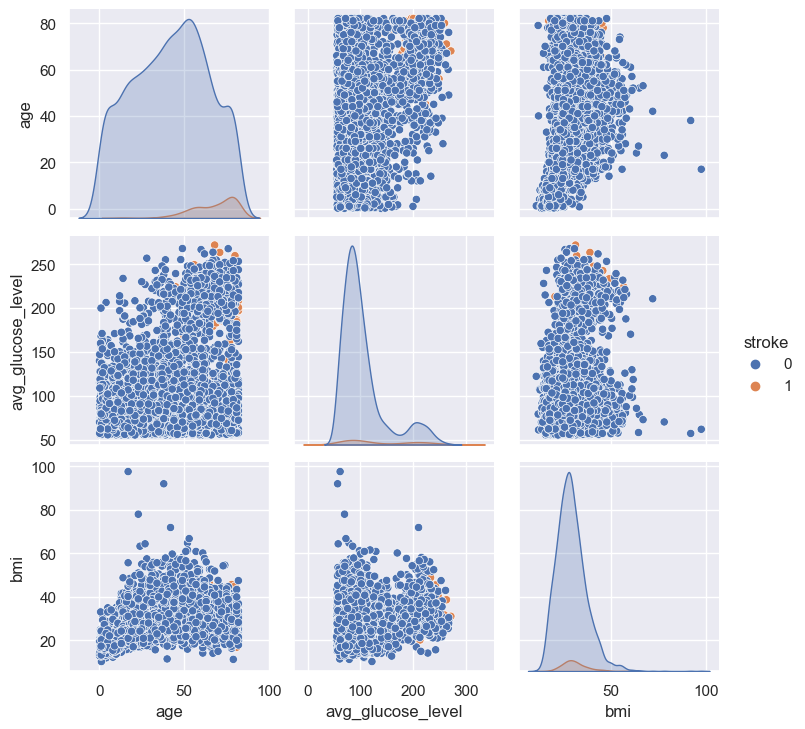

In [95]:
# Create pairplot of all data
# Setting the stying of the Seaborn figure
sns.set_style('darkgrid')

plot_col = df[['age', 'avg_glucose_level', 'bmi', 'stroke']]
sns.pairplot(plot_col, hue='stroke');

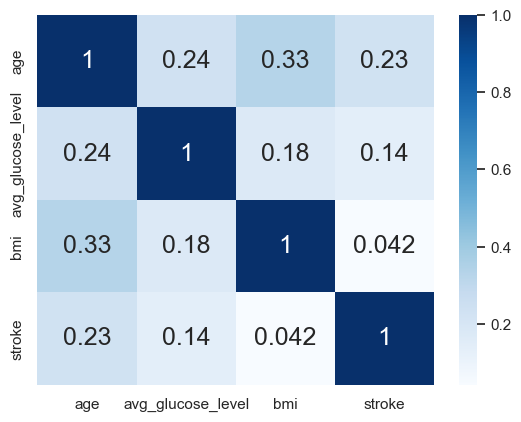

In [112]:
# Heatmap for numeric columns
df_num = df.select_dtypes('number')
corr = df_num.corr()
sns.heatmap(corr, cmap='Blues', annot=True);

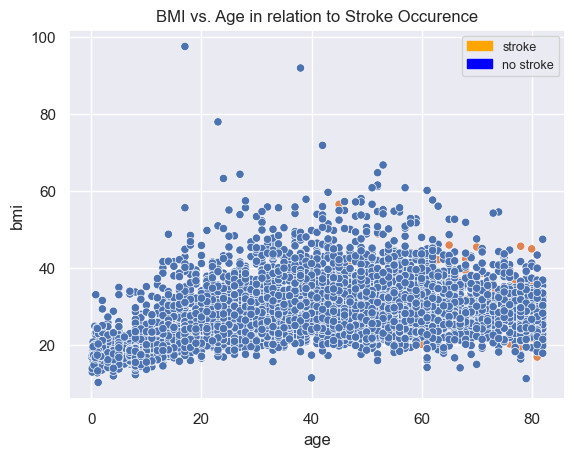

In [98]:
# bmi vs age_status and the relation of stroke
orange_label = mpatches.Patch(color='orange', label='stroke')
blue_label = mpatches.Patch(color='blue', label='no stroke')

sns.scatterplot(data=df, x='age', y='bmi', hue='stroke');
plt.legend(handles=[orange_label, blue_label], fontsize=9, loc='upper right');
plt.title('BMI vs. Age in relation to Stroke Occurence');

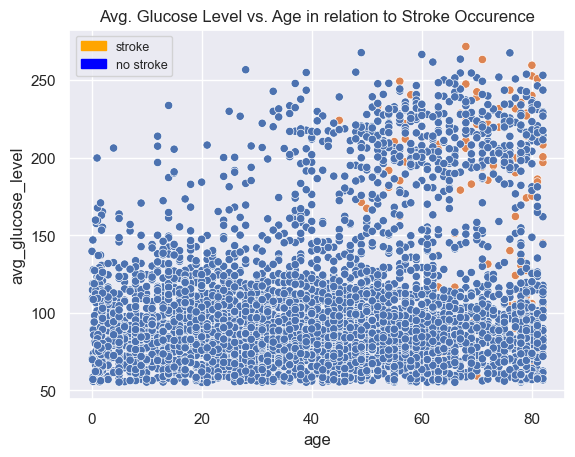

In [99]:
# scatter plot of glucose levels vs age with the relation to stroke
orange_label = mpatches.Patch(color='orange', label='stroke')
blue_label = mpatches.Patch(color='blue', label='no stroke')


sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke')
plt.legend(handles=[orange_label, blue_label], fontsize=9, loc='upper left');
plt.title('Avg. Glucose Level vs. Age in relation to Stroke Occurence');

> This scatterplot shows average glucose levels according to age in relation to stroke occurrence. A majority of the strokes that occurred tend to be above age 40, while the average glucose levels range greatly.

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   object 
 3   heart_disease      4909 non-null   object 
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 589.3+ KB


In [146]:
def plot_cat(x, y):
    sns.barplot(x=df[x], y=df[y], data=df, hue='stroke');

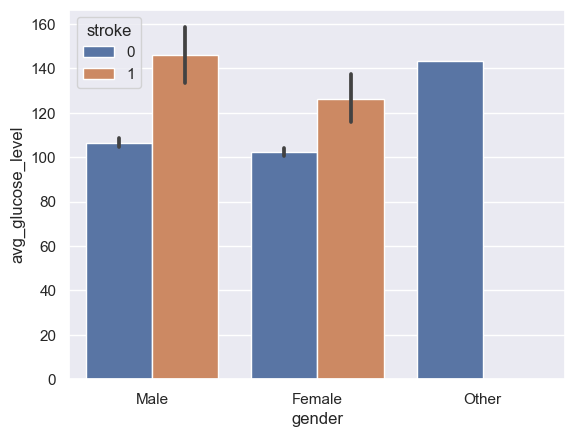

In [148]:
plot_cat('gender', 'avg_glucose_level')

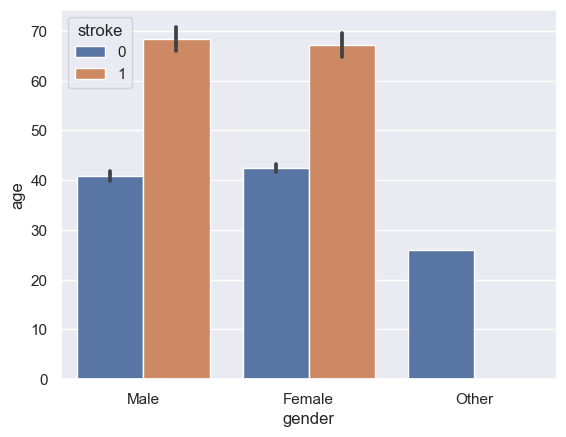

In [149]:
plot_cat('gender', 'age')

## Preprocessing for Machine Learning (No Feature Engineering)

In [ ]:
# Inspect data
df_ml.info()

In [ ]:
# Remove duplicates
df_ml.duplicated().sum()

In [ ]:
# Remove 'id' column
df_ml.drop('id', axis=1, inplace=True)
df_ml.info()

In [ ]:
df_ml.isna().sum()

In [ ]:
# Determine class balance
df['stroke'].value_counts(normalize=True)

In [ ]:
# Instantiate smote variable for class balance
smote = SMOTE()

# Instantiate scaler
scaler = StandardScaler()

# Insatiate one hot encoder
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse=False)

# Imputer
mean_imp = SimpleImputer(strategy = 'mean')

# Column selectors
cat_col = make_column_selector(dtype_include = 'object')
num_col = make_column_selector(dtype_include = 'number')

In [ ]:
# Model validation
# Features matrix and target
X = df_ml.drop('stroke', axis=1)
y = df_ml['stroke']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
print(X.head())
y.head()

In [ ]:
# Instantiate pipelines
num_pipe = make_pipeline(mean_imp, scaler)
num_pipe

In [ ]:
# Preprocessor
# Tuples for columntransformer
num_tuple = (num_pipe, num_col)
cat_tuple = (ohe, cat_col)

# Columntransformer
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

## Default Logistic Regression Model

In [ ]:
# Instance of model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Instantiate pipeline
lr_pipe = make_pipeline(preprocessor, smote, log_reg)
lr_pipe

# Fit on training data
lr_pipe.fit(X_train, y_train)

In [ ]:
# Save Predictions
lr_train_preds = lr_pipe.predict(X_train)
lr_test_preds = lr_pipe.predict(X_test)

In [ ]:
# Default Model Metrics
# Confusion Matrix
labels = ['No Stroke', 'Stroke']
ConfusionMatrixDisplay.from_predictions(y_test, lr_test_preds, cmap='Greens', 
                                        normalize='true', display_labels=labels).ax_.set_title('Default Logistic Regression Confusion Matrix')

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, lr_train_preds, target_names=labels))
print('Test Classification Report', '\n')
print(classification_report(y_test, lr_test_preds, target_names=labels))

## Default Random Forest Model

In [ ]:
# Default Random Forest Model
# Instance of model
rf = RandomForestClassifier()

# Pipeline
rf_pipe = make_pipeline(preprocessor, smote, rf)

# Fit on Train
rf_pipe.fit(X_train, y_train)

In [ ]:
# Save Predictions
rf_train_preds = rf_pipe.predict(X_train)
rf_test_preds = rf_pipe.predict(X_test)

In [ ]:
# Default Model Metrics
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, rf_test_preds, cmap='Greens', normalize='true', display_labels=labels).ax_.set_title('Default RF Confusion Matrix')

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, rf_train_preds, target_names=labels))
print('Test Classification Report', '\n')
print(classification_report(y_test, rf_test_preds, target_names=labels))

## Default K-Nearest Neighbor Model

In [ ]:
# Default KNN Model
# Instance of model
knn = KNeighborsClassifier()

# Pipeline
knn_pipe = make_pipeline(preprocessor, smote, knn)

# Fit on Train
knn_pipe.fit(X_train, y_train)

In [ ]:
# Save Predictions
knn_train_preds = knn_pipe.predict(X_train)
knn_test_preds = knn_pipe.predict(X_test)

In [ ]:
# KNN Model Metrics
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, knn_test_preds, cmap='Greens', normalize='true', display_labels=labels).ax_.set_title('KNN Confusion Matrix')

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, knn_train_preds, target_names=labels))
print('Test Classification Report', '\n')
print(classification_report(y_test, knn_test_preds, target_names=labels))

## Tuned Logistic Regression Model

In [ ]:
# Tuning Random Forest Model with GridSearchCV
# Looking a Parameters
lr_pipe.get_params()

In [ ]:
# Parameter Grid
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
              'logisticregression__class_weight': ['balanced', None],
              'logisticregression__max_iter': [100, 1000, 2000],
              'logisticregression__penalty': ['l2', 'l1'],
              'logisticregression__solver': ['liblinear']}

In [ ]:
lr_gridscv = GridSearchCV(lr_pipe, param_grid)

# Fit on Train
lr_gridscv.fit(X_train, y_train)

In [ ]:
# Display best parameters for tuned model
print('Best Logistic Regression Parameters:')
print(lr_gridscv.best_params_)
lr_best_pipe = lr_gridscv.best_estimator_
print(f'Accuracy of the Best Logistic Regression Model: {lr_best_pipe.score(X_test, y_test)}')

In [ ]:
# Save Predictions
lr_best_pipe_train_preds = lr_best_pipe.predict(X_train)
lr_best_pipe_test_preds = lr_best_pipe.predict(X_test)

In [ ]:
# Tuned Random Forest Model Metrics
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, lr_best_pipe_test_preds, 
                                        cmap='Greens', normalize='true', 
                                        display_labels=labels).ax_.set_title('Logistic Regression Confusion Matrix')

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, lr_best_pipe_train_preds, target_names=labels))
print('Test Classification Report', '\n')
print(classification_report(y_test, lr_best_pipe_test_preds, target_names=labels))

## Feature Engineering For Machine Learning

In [ ]:
# Use 'bmi' column to create a new categorical column
# bmi < 18.5 = underweight
# bmi >= 18.5 | < 24.9 = normal weight
# bmi >= 25 | < 29.9 = overweight
# bmi >= 30 | < 34.9 = class 1 obesity
# bmi >= 35 | < 39.9 = class 2 obesity
# bmi >= 40 = class 3 obesity
df_ml['weight_status'] = df_ml['bmi'].apply(lambda x: 'underweight' if x < 18.5 else
                            'normal weight' if x >= 18.5 and x < 24.9 else
                            'overweight' if x >= 25 and x < 29.9 else 
                            'class 1 obesity' if x >= 30 and x < 34.9 else
                            'class 2 obesity' if x >= 35 and x < 39.9 else
                            'class 3 obesity')
df_ml['weight_status'].value_counts()

In [ ]:
# Drop 'bmi' column
df_ml.drop(columns='bmi', inplace=True)
df_ml.info()

In [ ]:
# Use 'age' column to create a new categorical column
df_ml['age_status'] = df_ml['age'].apply(lambda x: 'infant' if x <= 1 else 'child' if x > 1
                           and x <= 12 else 'adolescent' if x > 12 and x <= 17
                           else 'adult' if x > 17 and x < 65 else 'senior')
df_ml['age_status'].value_counts()

In [ ]:
# Drop 'age' column
df_ml.drop(columns='age', inplace=True)
df_ml.head()

## Tuned Model with Feature Engineering

In [ ]:
# Model validation
# Features matrix and target
X = df_ml.drop('stroke', axis=1)
y = df_ml['stroke']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Instantiate pipelines
num_pipe = make_pipeline(scaler)
num_pipe

In [ ]:
# Preprocessor
# Tuples for columntransformer
num_tuple = (num_pipe, num_col)
cat_tuple = (ohe, cat_col)

# Columntransformer
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

In [ ]:
# Default Random Forest Model
# Instance of model
lr = LogisticRegression(random_state=42, max_iter=1000)

# Pipeline
lr_pipe = make_pipeline(preprocessor, smote, lr)

# Fit on Train
lr_pipe.fit(X_train, y_train)

In [ ]:
# Save Predictions
lr_train_preds = lr_pipe.predict(X_train)
lr_test_preds = lr_pipe.predict(X_test)

In [ ]:
# Default Random Forest Model Metrics
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, lr_test_preds, 
                                        cmap='Greens', normalize='true', 
                                        display_labels=labels).ax_.set_title('Logistic Regression with Feature Engineering Confusion Matrix')

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, lr_train_preds, target_names=labels))
print('Test Classification Report', '\n')
print(classification_report(y_test, lr_test_preds, target_names=labels))

In [ ]:
# Tuning Random Forest Model with GridSearchCV
# Looking a Parameters
lr_pipe.get_params()

In [ ]:
# Parameter Grid
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
              'logisticregression__class_weight': ['balanced', None],
              'logisticregression__max_iter': [3000, 4000, 5000],
              'logisticregression__penalty': ['none'],
              'logisticregression__solver': ['lbfgs']}

In [ ]:
lr_gridscv = GridSearchCV(lr_pipe, param_grid)

# Fit on Train
lr_gridscv.fit(X_train, y_train)

In [ ]:
# Display best parameters for tuned model
print('Best Logistic Regression Parameters:')
print(lr_gridscv.best_params_)
best_pipe = lr_gridscv.best_estimator_
print(f'Accuracy of the Best Logistic Regression Model: {best_pipe.score(X_test, y_test)}')

In [ ]:
# Save Predictions
best_pipe_train_preds = best_pipe.predict(X_train)
best_pipe_test_preds = best_pipe.predict(X_test)

In [ ]:
# Tuned Random Forest Model Metrics
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, best_pipe_test_preds, 
                                        cmap='Greens', normalize='true', 
                                        display_labels=labels).ax_.set_title('Logistic Regression Confusion Matrix')

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, best_pipe_train_preds, target_names=labels))
print('Test Classification Report', '\n')
print(classification_report(y_test, best_pipe_test_preds, target_names=labels))

## Recommendations

1. Model Recommendation
    - The model I recommend is the default logistic regression model. 